<h3>IS 602: HW 10<.h3>

In [128]:
%matplotlib inline

In [129]:
import pandas as pd
from pandas import Series,DataFrame
import math
import os
import csv
import re
from matplotlib import pyplot as plt
import numpy as np
import scipy.ndimage as ndi
from skimage import io, filters
import seaborn as sns

In [130]:
wd = raw_input("\nPlease enter the file path to the input files\n ==>")    


Please enter the file path to the input files
 ==>/Users/dainabouquin/Documents/CUNYsps_MS/IS_602


In [131]:
import os
os.chdir(wd)

<h4> Cars </h4>

In [132]:
try:
           file_reader = csv.reader(open("cars.data.csv"),delimiter = ',', quoting = csv.QUOTE_NONE)
except:
            print "\nError: The file path you entered was incorrect.n"

buying = list()
maint = list()
doors = list()
persons = list()
lug_boot = list()
safety = list()
category = list()

for line in file_reader:
    buying.append(line[0]) 
    maint.append(line[1]) 
    doors.append(line[2]) 
    persons.append(line[3]) 
    lug_boot.append(line[4]) 
    safety.append(line[5]) 
    category.append(line[6])

df = DataFrame()

df['buying'] =  buying
df['maint'] =  maint
df['doors'] =  doors
df['persons'] =  persons
df['lug_boot'] =  lug_boot
df['safety'] =  safety
df['category'] =  category

# remove first row
df2 = df.ix[1:]
print df2[:5]

  buying  maint doors persons lug_boot safety category
1  vhigh  vhigh     2       2    small    low    unacc
2  vhigh  vhigh     2       2    small    med    unacc
3  vhigh  vhigh     2       2    small   high    unacc
4  vhigh  vhigh     2       2      med    low    unacc
5  vhigh  vhigh     2       2      med    med    unacc


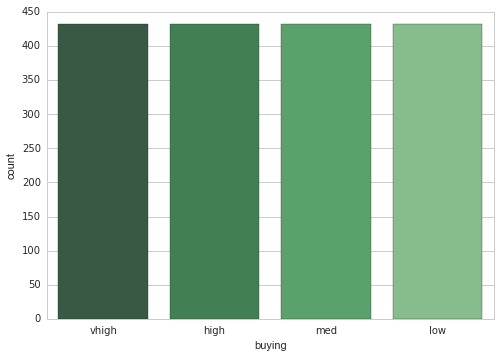

In [133]:
# Bar plotting with seaborn
sns.set(style="whitegrid", color_codes=True)
df2[:5]
b_plot = sns.countplot(x="buying", data=df2, palette="Greens_d")

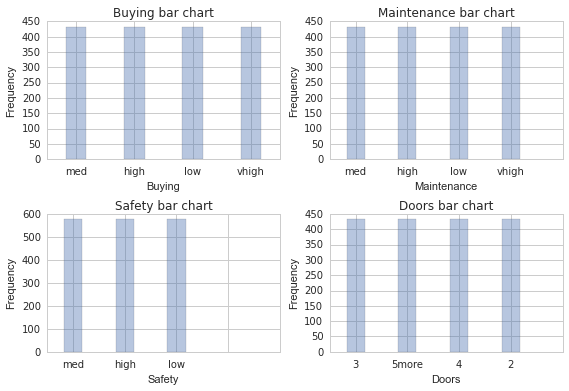

In [134]:
# Another approach to plotting using matplotlib
# plot barcharts for "Buying", "Doors", "Safety" and "Maintenance" in the cars data

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flat

# buying
buying1 = Series((df2['buying']))
l = buying1.value_counts()
buying_levels =  list(l.index)
buying_counts = list(l.values)

p = range(1, len(buying_levels) + 1)
ax0.bar(p,buying_counts,  0.35, align='center', alpha=0.4)

plt.sca(axes[0, 0])
plt.xticks(p, buying_levels)
plt.xlabel('Buying')
plt.ylabel('Frequency')
plt.title('Buying bar chart')

# maintenance
l_maint = Series((df2['maint']))
l = l_maint.value_counts()
maint_levels =  list(l.index)
maint_counts = list(l.values)
p = range(1, len(maint_levels) + 1)
ax1.bar(p,maint_counts,  0.35, align='center', alpha=0.4)

plt.sca(axes[0, 1])
plt.xticks(pos, maint_levels)
plt.xlabel('Maintenance')
plt.ylabel('Frequency')
plt.title('Maintenance bar chart')

# safety
l_safety = Series((df2['safety']))
l = l_safety.value_counts()
safety_levels =  list(l.index)
safety_counts = list(l.values)
p = range(1, len(safety_levels) + 1)
ax2.bar(p,safety_counts,  0.35, align='center', alpha=0.4)

plt.sca(axes[1, 0])
plt.xticks(pos, safety_levels)
plt.xlabel('Safety')
plt.ylabel('Frequency')
plt.title('Safety bar chart')

# doors
l_doors = Series((df2['doors']))
l = l_doors.value_counts()
doors_levels =  list(l.index)
doors_counts = list(l.values)
p = range(1, len(doors_levels) + 1)
ax3.bar(p,doors_counts,  0.35, align='center', alpha=0.4)

plt.sca(axes[1, 1])
plt.xticks(pos, doors_levels)
plt.xlabel('Doors')
plt.ylabel('Frequency')
plt.title('Doors bar chart')

fig.tight_layout() 
plt.show()

<h4>Brain and Body</h4>

In [135]:
    try:
            fs = open("brainandbody.csv")
    except:
            print "\nError: The file path you entered was incorrect.\n"
    try:
            f_lines = fs.readlines()
            fs.close()
    except:
            print "\nCannot read file.\n"
            sys.exit()
       
    else:
            l = [(i.rstrip("\n")).split(",")for i in f_lines]
            body_l = list()
            brain_l = list()
            
            for j in range(1,len(l)):
                body_l.append(l[j][1])
                brain_l.append(l[j][2])

            body_wt_arr = np.array(body_l)
            brain_wt_arr = np.array(brain_l)
            x = brain_wt_arr.astype(float)
            y = body_wt_arr.astype(float)

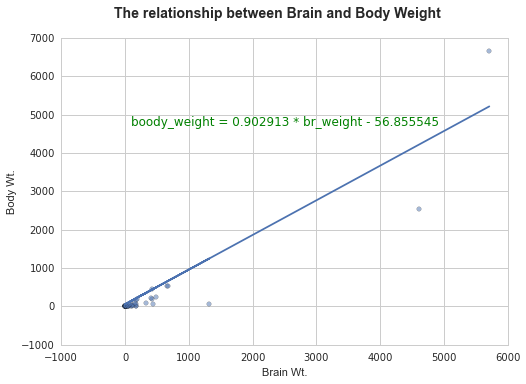

In [136]:
plt.scatter(x,y,alpha=0.5,)
plt.suptitle("The relationship between Brain and Body Weight",  fontsize=14, fontweight='bold')
plt.xlabel("Brain Wt.")
plt.ylabel("Body Wt.")
slope, intercept = np.polyfit(x,y,1)


if intercept > 0:
         eq = "body_wt = %f * brain_wt + %f" % (slope, intercept)
if intercept < 0:
        intercept = -1 * intercept
        eq = "boody_weight = %f * br_weight - %f" % (slope, intercept) 
if intercept == 0:
       eq = "body_weight = %f * brain_weight" % (slope) 


plt.plot(x,slope*x + intercept, '-')
plt.text(100, 5000, eqn, horizontalalignment='left',verticalalignment='top', color='green', fontsize=12)
plt.show()

<h4>Finding center points</h4>

8 objects identified


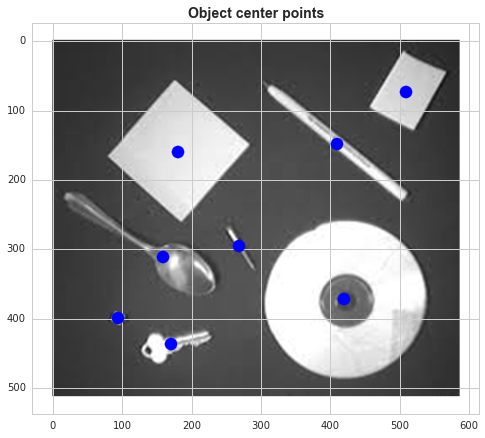

In [137]:
plt.rcParams['font.size'] = 10

#Reading the objects.png file
try:
   image = ndi.imread('objects.png')
except:
   print "Make sure the objects_copy.png is in the correct directory"

# Code from HW assignment
#Applying the gaussian filter to make the image blurr
#The image is futher filtered using the mean value of the pixels
f_array = filters.gaussian_filter(image, sigma = 2, multichannel=False)
f_array = f_array > f_array.mean()

#Displaying the original and filtered images
l = len(image.shape)
f_array[:] = ndi.binary_opening(f_array,np.ones((np.ones(l) * 2)))
f_array[:] = ndi.binary_closing(f_array,np.ones((np.ones(l) * 2)))

labels, count = ndi.label(f_array)
print '%s objects identified' % (count)

#Ploting the image with center of mass
fig, ax1 = plt.subplots(1, figsize=(8, 8))
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Object center points', fontsize=14, fontweight='bold')
t = ndi.measurements.center_of_mass(f_array, labels, list(range(1,count+1)))
t_array = np.array(t)
x = list(t_array[:,1])
y = list(t_array[:,0])
plt.scatter(x=x,y=y, c='r', color = 'blue', s=150)

plt.show()

<h3>Plotting the HTTP data</h3>

In [138]:
    s = open("HW9_data.txt") # this is what I names the data used for HW9. 
                            # You can change this file name to match what you have named your file
    while True:
        if s == '':
            print '\n\nFailure'
            sys.exit()
        
        try:
            f_reader = csv.reader(s,delimiter = ' ', quoting = csv.QUOTE_NONE)
        except:
            print "\nI cannot find the file. Please enter the name of the file.\n"
            s = raw_input("==>")
            continue
        else:
            break  
    
    origin = list()
    day = list()
    hour = list()
    minute = list()
    second = list()
    req_type = list()
    url = list()
    retcode = list()
    bytes_trans = list()
    
    for line in f_reader:
        origin.append(line[0])
        dt = re.match(r'(.*):(.*):(.*):(.*)',re.sub(r'\[|\]','',line[1]))
        day.append(dt.group(1))
        hour.append(dt.group(2))
        minute.append(dt.group(3))
        second.append(dt.group(4))

        req = re.sub(r'\"| *','',line[2])
        req_type.append(req)
        
        if line[-1] == '-':
            bytes_trans.append(long(0))
        else:
            bytes_trans.append(long(line[-1]))

        retcode.append(int(line[-2]))
        l = len(line)
        u = re.sub(r'\"','',line[3])
        if (l > 7):
            ul = line[4:(l-3)] #(l - 3) avoids HTTP/1.0 text
            ul = " ".join(ul)
            url.append(u +" "+ ul)
        else:
            url.append(u)
        
    df = DataFrame()
    
    df['origin'] = origin
    df['day'] = day
    df['hour'] = hour
    df['minute'] = minute
    df['second'] = second
    df['req_type'] = req_type
    df['url'] = url
    df['retcode'] = retcode
    df['bytes_transferred'] = bytes_transferred
    
    l = Series((df['hour']))
    l = l.value_counts()
    l = l.sort_index()

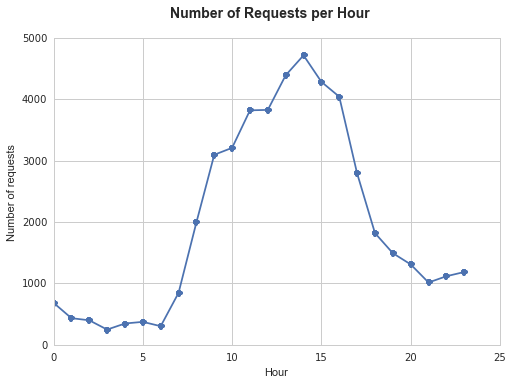

In [139]:
# Plotting number of requests per hour
plt.plot(l,'o')
plt.plot(l,'bo-')
plt.xlabel("Hour")
plt.ylabel("Number of requests")
plt.suptitle("Number of Requests per Hour", fontsize=14, fontweight='bold')
plt.show()